In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base=automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Measurements=Base.classes.measurement
Station=Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session=Session(engine)

# Exploratory Precipitation Analysis

In [9]:
first_row = session.query(Measurements).first()
first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x7fa81944e2b0>,
 'tobs': 65.0,
 'date': '2010-01-01',
 'id': 1,
 'prcp': 0.08,
 'station': 'USC00519397'}

In [10]:
# Find the most recent date in the data set.
recent_date=session.query(Measurements.date)\
    .order_by(Measurements.date.desc()).limit(1).all()
recent_date

[('2017-08-23')]

In [11]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
prcp=session.query(Measurements.date, Measurements.prcp)\
    .order_by(Measurements.date.desc())\
    .filter(Measurements.date<='2017-08-23')\
    .filter(Measurements.date >='2016-08-23')\
    .all()
prcp
# Starting from the most recent data point in the database. 
# Calculate the date one year from the last date in data set.
# Perform a query to retrieve the data and precipitation scores
# Save the query results as a Pandas DataFrame  
precipitation=pd.DataFrame(prcp)
precipitation

,date,prcp
0,2017-08-23,0.00
1,2017-08-23,0.00
2,2017-08-23,0.08
3,2017-08-23,0.45
4,2017-08-22,0.00
...,...,...
2225,2016-08-23,0.05
2226,2016-08-23,NaN
2227,2016-08-23,0.02
2228,2016-08-23,1.79


In [12]:
#set the index to the date colum
precipitation.dropna(inplace=True)
precipitation.set_index('date', inplace=True)
# Sort the dataframe by date
precipitation.sort_values('date',ascending= True, inplace=True)

In [13]:
precipitation

,prcp
date,
2016-08-23,0.70
2016-08-23,0.00
2016-08-23,0.15
2016-08-23,1.79
2016-08-23,0.02
...,...
2017-08-22,0.00
2017-08-23,0.45
2017-08-23,0.08


In [14]:
# Use Pandas Plotting with Matplotlib to plot the data
precipitation.reset_index(inplace=True)

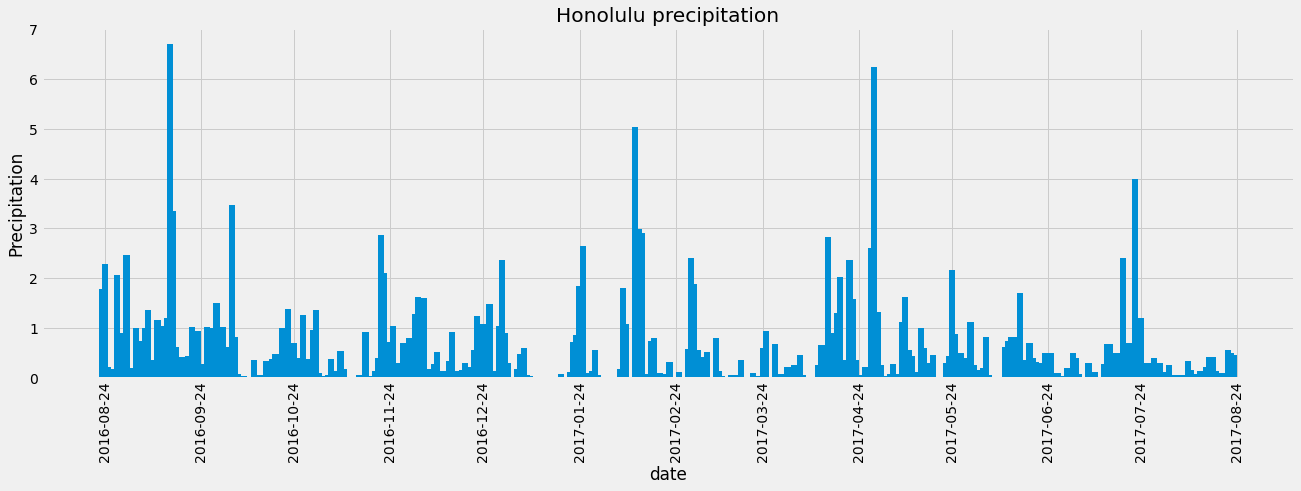

In [15]:
# Use Pandas Plotting with Matplotlib to plot the data
plt.figure(figsize=(20,6))

pyplot_bar=plt.bar(precipitation['date'], precipitation['prcp'], width= 2)
ax = plt.gca()
ax.set_xticks(['2016-08-24','2016-09-24', '2016-10-24','2016-11-24', '2016-12-24','2017-01-24',\
               '2017-02-24','2017-03-24', '2017-04-24','2017-05-24','2017-06-24','2017-07-24','2017-08-24'])
plt.xticks(rotation='vertical')
plt.title('Honolulu precipitation')
plt.xlabel('date')
plt.ylabel('Precipitation')
plt.show()

In [16]:
# Use Pandas to calcualte the summary statistics for the precipitation data
precipitation.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [82]:
# Design a query to calculate the total number stations in the dataset
stations = session.query(Station.station).all()
stations

[('USC00519397'),
 ('USC00513117'),
 ('USC00514830'),
 ('USC00517948'),
 ('USC00518838'),
 ('USC00519523'),
 ('USC00519281'),
 ('USC00511918'),
 ('USC00516128')]

In [89]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
count_ = func.count('*')
results = session.query(Measurements.station, count_)\
        .group_by(Measurements.station)\
        .order_by(count_.desc())\
        .all()

results

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [33]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.


In [31]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


# Close session

In [ ]:
# Close Session
session.close()